In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
pd.set_option('display.max_columns', 40)

Import Dataset

In [ ]:
import pandas as pd

data1 = pd.read_csv('/content/drive/MyDrive/Customer_DF (1).csv')
data2 = pd.read_csv('/content/drive/MyDrive/cust_transaction_details (1).csv')


In [ ]:
data1.head()

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
2,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False
3,3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False
4,4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True


In [ ]:
data2.head()


,Unnamed: 0,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,3,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,4,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled


In [ ]:
data1.shape ,data2.shape

((168, 10), (623, 11))

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              168 non-null    int64 
 1   customerEmail           168 non-null    object
 2   customerPhone           168 non-null    object
 3   customerDevice          168 non-null    object
 4   customerIPAddress       168 non-null    object
 5   customerBillingAddress  168 non-null    object
 6   No_Transactions         168 non-null    int64 
 7   No_Orders               168 non-null    int64 
 8   No_Payments             168 non-null    int64 
 9   Fraud                   168 non-null    bool  
dtypes: bool(1), int64(4), object(5)
memory usage: 12.1+ KB


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Unnamed: 0                        623 non-null    int64 
 1   customerEmail                     623 non-null    object
 2   transactionId                     623 non-null    object
 3   orderId                           623 non-null    object
 4   paymentMethodId                   623 non-null    object
 5   paymentMethodRegistrationFailure  623 non-null    int64 
 6   paymentMethodType                 623 non-null    object
 7   paymentMethodProvider             623 non-null    object
 8   transactionAmount                 623 non-null    int64 
 9   transactionFailed                 623 non-null    int64 
 10  orderState                        623 non-null    object
dtypes: int64(4), object(7)
memory usage: 53.7+ KB


Exploratory Data Analysis (EDA)

Data Cleaning

In [ ]:
data1.duplicated().any()

False

In [ ]:
data2.duplicated().any()

False

Check Missing Value

In [ ]:
data1.isna().any()

Unnamed: 0                False
customerEmail             False
customerPhone             False
customerDevice            False
customerIPAddress         False
customerBillingAddress    False
No_Transactions           False
No_Orders                 False
No_Payments               False
Fraud                     False
dtype: bool

In [ ]:
data2.isna().any()

Unnamed: 0                          False
customerEmail                       False
transactionId                       False
orderId                             False
paymentMethodId                     False
paymentMethodRegistrationFailure    False
paymentMethodType                   False
paymentMethodProvider               False
transactionAmount                   False
transactionFailed                   False
orderState                          False
dtype: bool

In [ ]:
data1['customerEmail'].nunique() , data2['customerEmail'].nunique()

(161, 136)

Data Visualization

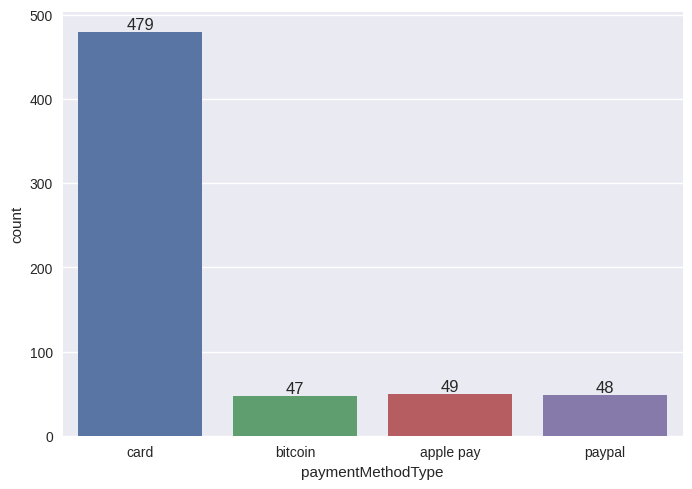

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=data2, x='paymentMethodType')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, ha='center', va='bottom')
plt.show()


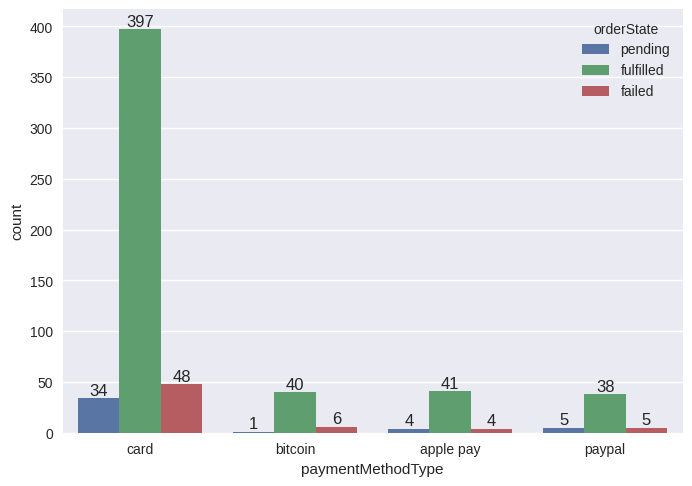

In [ ]:
sns.countplot(x='paymentMethodType',hue='orderState',data = data2)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, ha='center', va='bottom')
plt.show()

payment most failure

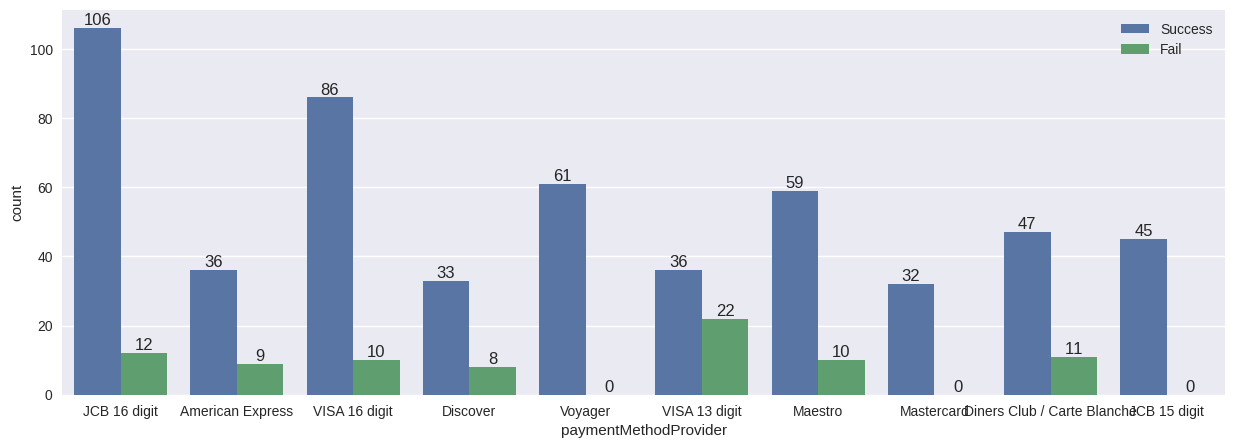

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
sns.countplot(x='paymentMethodProvider', hue='paymentMethodRegistrationFailure', data=data2)
plt.legend(['Success', 'Fail'])
ax = plt.gca()
for p in ax.patches:
    height = np.nan_to_num(p.get_height(), 0)
    ax.text(p.get_x() + 0.2, p.get_y() + height, '%d' % height, fontsize=12, ha='center', va='bottom')
plt.show()


Total number of payments per Fraud Transactions

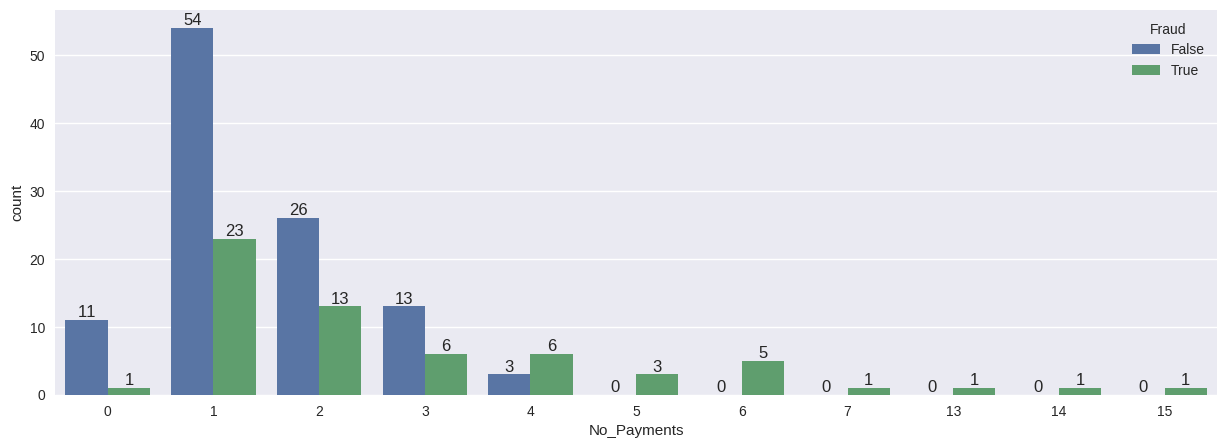

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'No_Payments',hue = 'Fraud',data=data1)
ax = plt.gca()
for p in ax.patches:
    height = np.nan_to_num(p.get_height(), 0)
    ax.text(p.get_x()+0.2, p.get_y() + height, '%d' % height,
            fontsize=12, ha='center', va='bottom')
plt.show()

Distribution of Transaction Amount

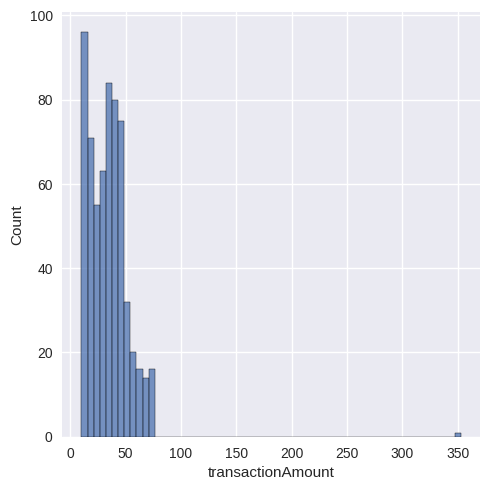

In [ ]:
sns.displot(data2['transactionAmount'])

In [ ]:
data2[data2['transactionAmount'] > 100]

,Unnamed: 0,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
189,189,uguzman@yahoo.com,ftiso5mr,32rax6,73a2hlmnm,0,card,VISA 16 digit,353,1,fulfilled


In [ ]:
data1[data1['customerEmail']=='uguzman@yahoo.com']['Fraud']

55    True
Name: Fraud, dtype: bool

Comparasion fraud & non fraud transactions

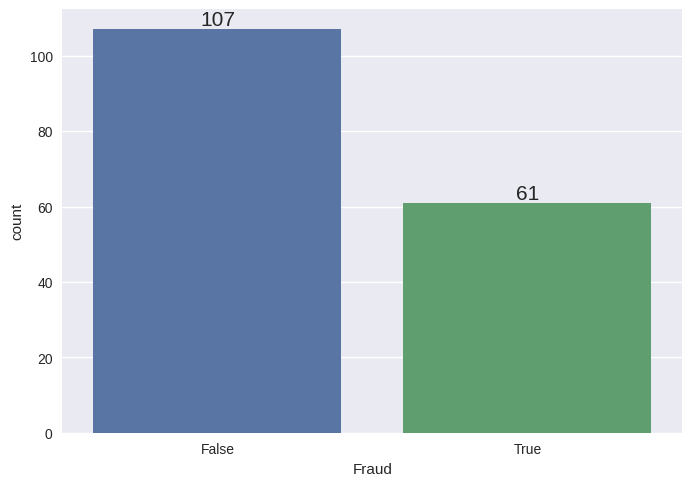

In [ ]:
sns.countplot(x= 'Fraud',data=data1)
ax = plt.gca()
for p in ax.patches:
    height = np.nan_to_num(p.get_height(), 0)
    ax.text(p.get_x()+0.4, p.get_y() + height, '%d' % height,
            fontsize=15, ha='center', va='bottom')
plt.show()

Feature Engineering

In [ ]:
final = data1[data1['customerEmail'].isin(data2['customerEmail'])== True].reset_index(drop=True)
final.shape

(143, 10)

In [ ]:
final.head()

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
2,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False
3,3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False
4,4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True


In [ ]:
final.drop('Unnamed: 0',axis = 1, inplace = True)

In [ ]:
No_transactionsFail = []
for i in range(0,143):
    s=0
    for j in range(0,623):
        if(final['customerEmail'][i]==data2['customerEmail'][j]):
            s += data2['transactionFailed'][j]
    No_transactionsFail.append(s)
final['No_transactionsFail'] = No_transactionsFail

In [ ]:
Total_transaction_amt = []
for i in range(0,143):
    s=0
    for j in range(0,623):
        if(final['customerEmail'][i]==data2['customerEmail'][j]):
            s += data2['transactionAmount'][j]
    Total_transaction_amt.append(s)
final['Total_transaction_amt'] = Total_transaction_amt


In [ ]:
paymentRegFailure = []
for i in range(0,143):
    s=0
    for j in range(0,623):
        if(final['customerEmail'][i]==data2['customerEmail'][j]):
            s += data2['paymentMethodRegistrationFailure'][j]
    paymentRegFailure.append(s)
final['PaymentRegFail'] = paymentRegFailure
def col_make(column_name,category):
    array = []
    for i in range(0,143):
        s=0
        for j in range(0,623):
            if(final['customerEmail'][i]==data2['customerEmail'][j]):
                if data2[column_name][j]==category:
                    s+=1
        array.append(s)
    return array

In [ ]:
PaypalPayments = col_make('paymentMethodType','paypal')
ApplePayments = col_make('paymentMethodType','apple pay')
BitcoinPayments = col_make('paymentMethodType','bitcoin')
CardPayments = col_make('paymentMethodType','card')

final['PaypalPayments']= PaypalPayments
final['ApplePayments']= ApplePayments
final['CardPayments']= CardPayments
final['BitcoinPayments']= BitcoinPayments

In [ ]:
OrdersFulfilled = col_make('orderState','fulfilled')
OrdersFailed =  col_make('orderState','failed')
OrdersPending = col_make('orderState','pending')

final['OrdersFulfilled'] = OrdersFulfilled
final['OrdersPending'] = OrdersPending
final['OrdersFailed'] = OrdersFailed

In [ ]:
JCB_16 = col_make('paymentMethodProvider','JCB 16 digit')
AmericanExp = col_make('paymentMethodProvider','American Express')
VISA_16 =  col_make('paymentMethodProvider','VISA 16 digit')
Discover =  col_make('paymentMethodProvider','Discover')
Voyager = col_make('paymentMethodProvider','Voyager')
VISA_13 = col_make('paymentMethodProvider','VISA 13 digit')
Maestro = col_make('paymentMethodProvider','Maestro')
Mastercard = col_make('paymentMethodProvider','Mastercard')
DC_CB =col_make('paymentMethodProvider','Diners Club / Carte Blanche')
JCB_15= col_make('paymentMethodProvider','JCB 15 digit')

final['JCB_16'] = JCB_16
final['AmericanExp'] = AmericanExp
final['VISA_16'] = VISA_16
final['Discover'] = Discover
final['Voyager'] = Voyager
final['VISA_13'] = VISA_13
final['Maestro'] = Maestro
final['Mastercard'] = Mastercard
final['DC_CB'] = DC_CB
final['JCB_15'] = JCB_15

In [ ]:
Trns_fail_order_fulfilled = []
for i in range(0,143):
    s=0
    for j in range(0,623):
        if(final['customerEmail'][i]==data2['customerEmail'][j]):
            if (data2['orderState'][j]=='fulfilled') & (data2['transactionFailed'][j]==1):
                s+=1
    Trns_fail_order_fulfilled.append(s)
final['Trns_fail_order_fulfilled'] = Trns_fail_order_fulfilled

In [ ]:
final.head()

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,No_transactionsFail,Total_transaction_amt,PaymentRegFail,PaypalPayments,ApplePayments,CardPayments,BitcoinPayments,OrdersFulfilled,OrdersPending,OrdersFailed,JCB_16,AmericanExp,VISA_16,Discover,Voyager,VISA_13,Maestro,Mastercard,DC_CB,JCB_15,Trns_fail_order_fulfilled
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,0,44,2,0,0,2,0,1,1,0,2,0,0,0,0,0,0,0,0,0,0
1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,1,111,1,0,0,0,3,3,0,0,0,2,1,0,0,0,0,0,0,0,1
2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False,2,131,0,0,0,5,0,4,0,1,4,0,0,1,0,0,0,0,0,0,2
3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False,0,85,0,0,0,3,0,3,0,0,0,0,0,0,3,0,0,0,0,0,0
4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True,2,411,0,0,3,4,0,6,0,1,3,1,2,0,0,1,0,0,0,0,2


In [ ]:
Duplicate_IP = []
for i in range(0,143):
    s=0
    for j in range(0,143):
        if(final['customerIPAddress'][i]==final['customerIPAddress'][j]):
            s+=1
    s-=1
    Duplicate_IP.append(s)
final['Duplicate_IP'] = Duplicate_IP


In [ ]:
Duplicate_Address = []
for i in range(0,143):
    s=0
    for j in range(0,143):
        if(final['customerBillingAddress'][i]==final['customerBillingAddress'][j]):
            s+=1
    s-=1
    Duplicate_Address.append(s)
final['Duplicate_Address']=Duplicate_Address

In [ ]:
final = pd.get_dummies(final,columns=['Fraud'],prefix=['Fraud'],drop_first=True)
final = final.rename(columns={"Fraud_True": "Fraud"})
final.head()

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,No_transactionsFail,Total_transaction_amt,PaymentRegFail,PaypalPayments,ApplePayments,CardPayments,BitcoinPayments,OrdersFulfilled,OrdersPending,OrdersFailed,JCB_16,AmericanExp,VISA_16,Discover,Voyager,VISA_13,Maestro,Mastercard,DC_CB,JCB_15,Trns_fail_order_fulfilled,Duplicate_IP,Duplicate_Address,Fraud
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,0,44,2,0,0,2,0,1,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,1,111,1,0,0,0,3,3,0,0,0,2,1,0,0,0,0,0,0,0,1,0,0,1
2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,2,131,0,0,0,5,0,4,0,1,4,0,0,1,0,0,0,0,0,0,2,0,0,0
3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,0,85,0,0,0,3,0,3,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0
4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,2,411,0,0,3,4,0,6,0,1,3,1,2,0,0,1,0,0,0,0,2,0,0,1


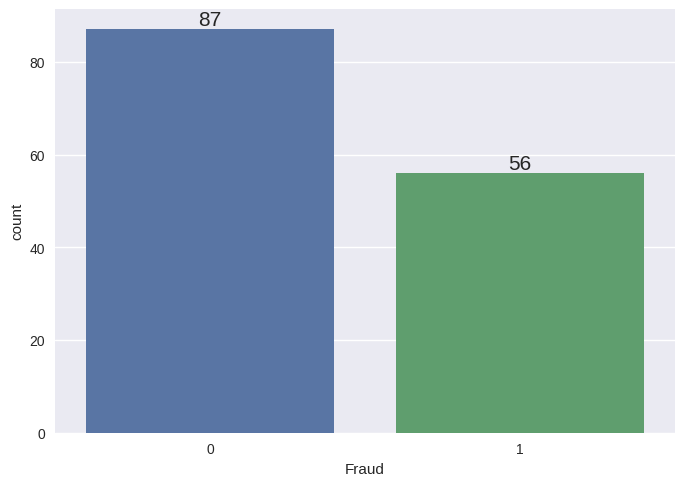

In [ ]:
sns.countplot(x= 'Fraud',data=final)
ax = plt.gca()
for p in ax.patches:
    height = np.nan_to_num(p.get_height(), 0)
    ax.text(p.get_x()+0.4, p.get_y() + height, '%d' % height,
            fontsize=15, ha='center', va='bottom')
plt.show()

In [ ]:
final[final['Duplicate_IP']>0]

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,No_transactionsFail,Total_transaction_amt,PaymentRegFail,PaypalPayments,ApplePayments,CardPayments,BitcoinPayments,OrdersFulfilled,OrdersPending,OrdersFailed,JCB_16,AmericanExp,VISA_16,Discover,Voyager,VISA_13,Maestro,Mastercard,DC_CB,JCB_15,Trns_fail_order_fulfilled,Duplicate_IP,Duplicate_Address,Fraud
39,jamescampbell@randall-pacheco.biz,599-142-6783,eaul63h9guyvwuymfn3z,45.203.99.249,"29408 Lisa Lock\nPort Jennifer, LA 26501-7040",7,3,2,4,146,0,0,0,7,0,7,0,0,0,0,0,5,0,2,0,0,0,0,4,3,0,1
67,warrenedward@arnold.com,201.737.5119x64000,6py7ewqjkxjw8zjl9eri,45.203.99.249,49680 Brian Squares Apt. 122\nPort Walterburgh...,4,4,14,0,117,2,0,1,3,0,4,0,0,0,2,0,0,1,1,0,0,0,0,0,3,2,1
73,shelby24@hotmail.com,(071)934-3315x27613,obb41ux0zfa2td5ajo9s,45.203.99.249,"3271 Cynthia Groves\nPort Jeremyberg, CO 27305",5,4,2,1,192,3,0,0,5,0,3,0,2,0,0,0,0,0,0,0,2,3,0,0,3,0,1
118,christinemills@mcgee.com,(651)355-4709,zbn9it3s7yl69bjtrnqf,45.203.99.249,"5156 Greene Park Apt. 748\nNew Sandra, CA 1480...",5,5,2,0,125,0,2,0,3,0,4,0,1,0,0,0,0,5,0,0,0,0,0,0,3,0,1


In [ ]:
final[final['Duplicate_Address']>0]

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,No_transactionsFail,Total_transaction_amt,PaymentRegFail,PaypalPayments,ApplePayments,CardPayments,BitcoinPayments,OrdersFulfilled,OrdersPending,OrdersFailed,JCB_16,AmericanExp,VISA_16,Discover,Voyager,VISA_13,Maestro,Mastercard,DC_CB,JCB_15,Trns_fail_order_fulfilled,Duplicate_IP,Duplicate_Address,Fraud
47,feliciabrown@gmail.com,(226)129-2677,z7xkuohhjbtiqs6q9rk9,115.137.171.103,49680 Brian Squares Apt. 122\nPort Walterburgh...,1,1,1,0,41,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,1
67,warrenedward@arnold.com,201.737.5119x64000,6py7ewqjkxjw8zjl9eri,45.203.99.249,49680 Brian Squares Apt. 122\nPort Walterburgh...,4,4,14,0,117,2,0,1,3,0,4,0,0,0,2,0,0,1,1,0,0,0,0,0,3,2,1
75,brittanydean@hotmail.com,06238721842,yq8xiivmx4prlgx0gofo,3517:8e52:885:8640:a59:f5fd:cb33:b06a,49680 Brian Squares Apt. 122\nPort Walterburgh...,6,4,1,2,202,0,0,0,6,0,6,0,0,0,0,0,0,6,0,0,0,0,0,2,0,2,1


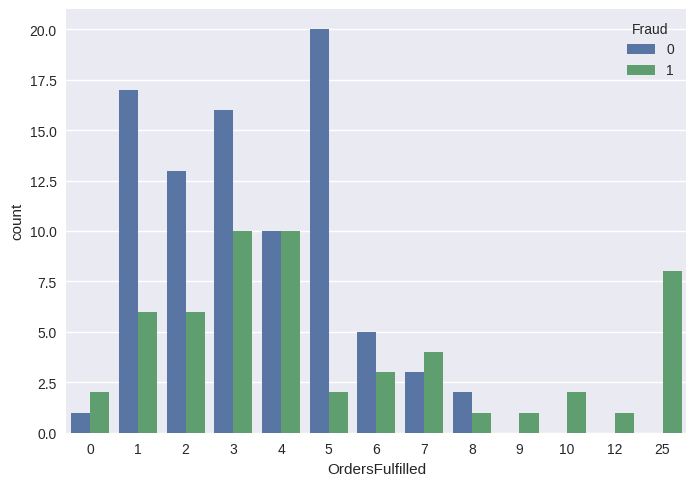

In [ ]:
sns.countplot(x = final['OrdersFulfilled'], hue = final['Fraud'])
plt.show()

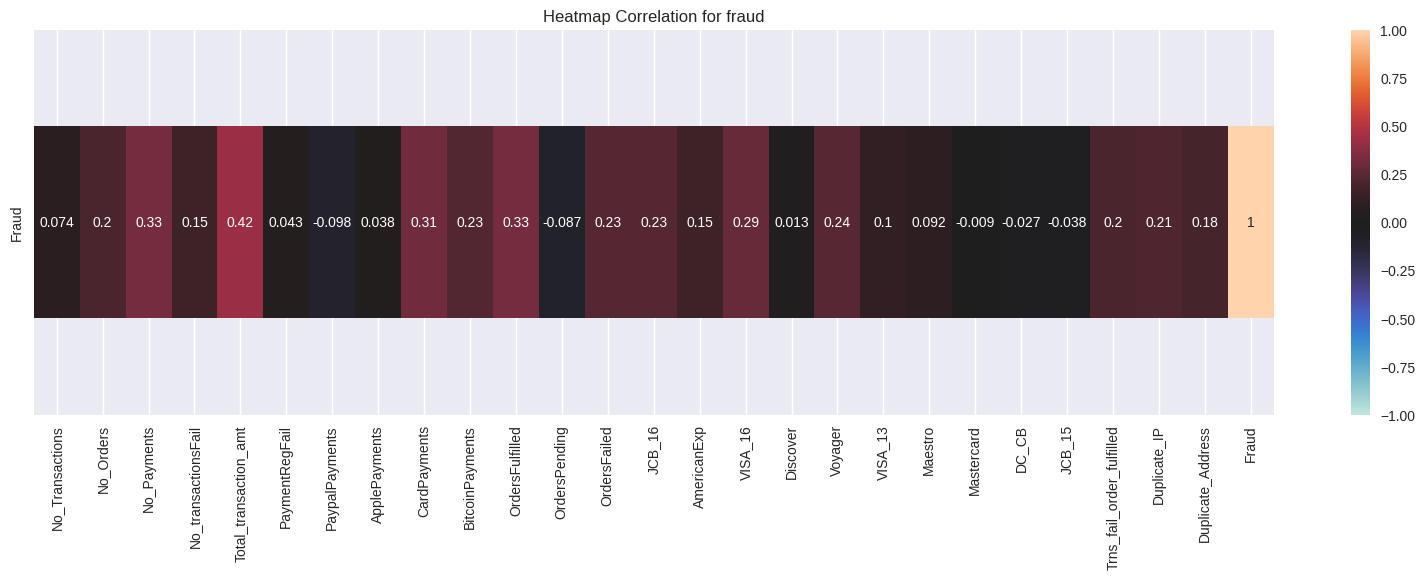

In [ ]:
corr = final.corr()
corr2 = corr.iloc[-1:,:]

plt.figure(figsize=(20, 5))
ax = sns.heatmap(corr2, annot=True, vmin=-1, vmax=1, center=0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Heatmap Correlation for fraud')
plt.show()

Create variable target

In [ ]:
x = final.drop(['customerEmail','customerPhone', 'customerDevice', 'customerIPAddress',
       'customerBillingAddress','Fraud'], axis=1)
y = final['Fraud']

Split, Train, Test Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train.shape

(114, 26)

In [ ]:
x_test.shape

(29, 26)

Machine Learning

In [ ]:
!pip install --upgrade scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 18.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


svm & knn ensemble

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm_model = SVC(probability=True)
knn_model = KNeighborsClassifier(n_neighbors=6)

estimators = [('svm', svm_model), ('knn', knn_model)]
ensemble_model = VotingClassifier(estimators=estimators, voting='soft')

ensemble_model.fit(x_train, y_train)
y_pred_ensemble = ensemble_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred_ensemble)
classification_rep = classification_report(y_test, y_pred_ensemble)
confusion_mat = confusion_matrix(y_test, y_pred_ensemble)

print("Ensemble Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", confusion_mat)


Ensemble Model Accuracy: 0.8620689655172413

Classification Report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90        18
           1       1.00      0.64      0.78        11

    accuracy                           0.86        29
   macro avg       0.91      0.82      0.84        29
weighted avg       0.89      0.86      0.85        29


Confusion Matrix:
 [[18  0]
 [ 4  7]]


cnn & lstm ensemble

In [ ]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import VotingClassifier

# Assuming x_train and x_test have the shape (samples, timesteps, features)
# If not, reshape your data accordingly

# Define and compile your LSTM model using TensorFlow
lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(x_train.shape[1], x_train.shape[2])),
    tf.keras.layers.Dense(10, activation='softmax')
])

lstm_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Assuming x_train and x_test are suitable for your LSTM model
lstm_model.fit(x_train, y_train, epochs=5)

# Use the LSTM model instead of KNN
estimators = [('lstm', lstm_model)]  # Removed 'cnn' since you only want LSTM
ensemble_model = VotingClassifier(estimators=estimators, voting='soft')

ensemble_model.fit(x_train, y_train)
y_pred_ensemble = ensemble_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred_ensemble)
classification_rep = classification_report(y_test, y_pred_ensemble)
confusion_mat = confusion_matrix(y_test, y_pred_ensemble)

print("Ensemble Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", confusion_mat)


IndexError: ignored

In [ ]:
model_params = {
     'svm': {
        'model': SVC(),
        'params' : {
            'C' : [1.0, 2.0, 4.0, 6.0, 8.0, 10.0],
            'kernel': ['rbf'],
            'gamma' : ['scale', 'auto']
        }
    },
    'knn': {
        'model' : KNeighborsClassifier(),
        'params' : {
            'n_neighbors' : [i for i in range(1,50,1)],
            'weights' : ['uniform', 'distance'],
            'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'n_jobs' : [-1]
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [i for i in range(1,100,5)],
            'criterion' : ['gini', 'entropy'],
            'max_features' : ['auto', 'sqrt', 'log2'],
            'n_jobs' : [-1]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(),
        'params': {
            'C': [1.0, 2.0, 4.0, 6.0, 8.0, 10.0],
            'penalty' : ['l1', 'l2', 'elasticnet'],
            'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'multi_class' : ['auto', 'ovr', 'multinomial'],
            'n_jobs' : [-1]
        }
    }
}

GridSearchCV

In [ ]:
%%time
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

data = pd.DataFrame(scores,columns=['model','best_score','best_params'])
data

CPU times: user 1min 48s, sys: 7.52 s, total: 1min 56s
Wall time: 2min 29s


,model,best_score,best_params
0,svm,0.710672,"{'C': 10.0, 'gamma': 'scale', 'kernel': 'rbf'}"
1,knn,0.718972,"{'algorithm': 'auto', 'n_jobs': -1, 'n_neighbo..."
2,random_forest,0.798419,"{'criterion': 'entropy', 'max_features': 'log2..."
3,logistic_regression,0.754941,"{'C': 2.0, 'multi_class': 'auto', 'n_jobs': -1..."


RandomizedSearchCV


In [ ]:
%%time
scores = []

for model_name, mp in model_params.items():
    clf_random =  RandomizedSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf_random.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf_random.best_score_,
        'best_params': clf_random.best_params_
    })

data1 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
data1

CPU times: user 7.34 s, sys: 680 ms, total: 8.02 s
Wall time: 11.5 s


,model,best_score,best_params
0,svm,0.710672,"{'kernel': 'rbf', 'gamma': 'scale', 'C': 10.0}"
1,knn,0.701581,"{'weights': 'distance', 'n_neighbors': 39, 'n_..."
2,random_forest,0.789723,"{'n_jobs': -1, 'n_estimators': 66, 'max_featur..."
3,logistic_regression,0.737549,"{'solver': 'liblinear', 'penalty': 'l1', 'n_jo..."


In [ ]:
data['best_params'][2]

{'criterion': 'entropy',
 'max_features': 'log2',
 'n_estimators': 61,
 'n_jobs': -1}

In [ ]:
model = RandomForestClassifier(n_jobs = -1, n_estimators = 16, max_features = 'auto', criterion = 'gini')

In [ ]:
model.fit(x_train, y_train)

RandomForestClassifier(max_features='auto', n_estimators=16, n_jobs=-1)

In [ ]:
RandomForestClassifier(n_estimators=16, n_jobs=-1)

RandomForestClassifier(n_estimators=16, n_jobs=-1)

In [ ]:
importance = model.feature_importances_

In [ ]:
kolom = list(x.columns)
kolom

['No_Transactions',
 'No_Orders',
 'No_Payments',
 'No_transactionsFail',
 'Total_transaction_amt',
 'PaymentRegFail',
 'PaypalPayments',
 'ApplePayments',
 'CardPayments',
 'BitcoinPayments',
 'OrdersFulfilled',
 'OrdersPending',
 'OrdersFailed',
 'JCB_16',
 'AmericanExp',
 'VISA_16',
 'Discover',
 'Voyager',
 'VISA_13',
 'Maestro',
 'Mastercard',
 'DC_CB',
 'JCB_15',
 'Trns_fail_order_fulfilled',
 'Duplicate_IP',
 'Duplicate_Address']

In [ ]:
df_imp = pd.DataFrame({'columns' : kolom,
                      'Importance' : importance})

In [ ]:
df_imp

,columns,Importance
0,No_Transactions,0.053490
1,No_Orders,0.052894
2,No_Payments,0.153637
3,No_transactionsFail,0.052887
4,Total_transaction_amt,0.145561
5,PaymentRegFail,0.016975
6,PaypalPayments,0.021212
7,ApplePayments,0.013271
8,CardPayments,0.041340
9,BitcoinPayments,0.027417


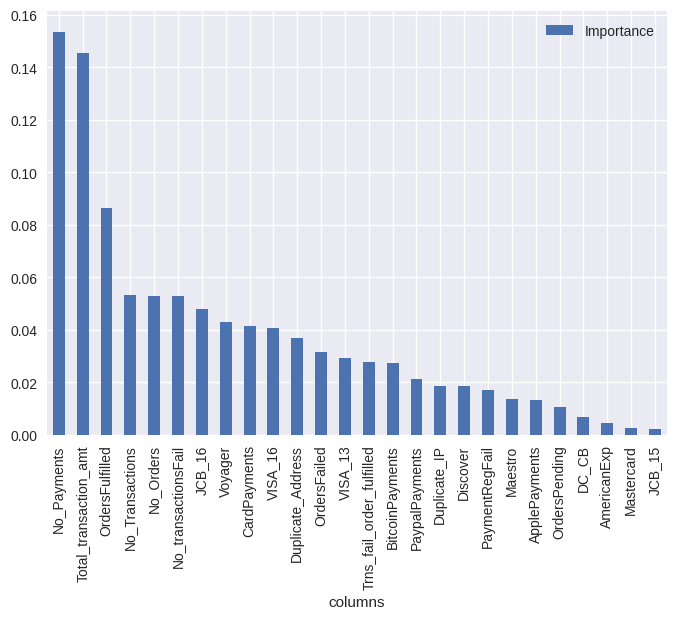

In [ ]:
df_imp.set_index('columns').sort_values('Importance',ascending=False
                                       ).plot(kind='bar')
plt.show()

In [ ]:
df_imp['persen'] = round(df_imp['Importance']*100,2)

In [ ]:
df_imp.sort_values('persen',ascending=False)

,columns,Importance,persen
2,No_Payments,0.153637,15.36
4,Total_transaction_amt,0.145561,14.56
10,OrdersFulfilled,0.086329,8.63
0,No_Transactions,0.053490,5.35
3,No_transactionsFail,0.052887,5.29
1,No_Orders,0.052894,5.29
13,JCB_16,0.047868,4.79
17,Voyager,0.042952,4.30
8,CardPayments,0.041340,4.13
15,VISA_16,0.040619,4.06
